# Predicting Bulldozer price using machine learning 

This notebook looks into using various python-based machine learning libraries in an attempt to building a machine learning model capable of predicting the sale price of bulldozers.

We are going to take the following approach :

1. Problem Definition 
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definiftion

> How well can we predict the future sale price of bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for?

## 2. Data

The data is downloaded from the kaggle Bluebook for Bulldozers competition.
https://www.kaggle.com/c/bluebook-for-bulldozers/data

There are three main datasets : 

 * Train.csv is the training set, which contains data through the end of 2011.
 * Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this   set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
 * Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1,     2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3. Evaluation

> The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more on evaluation in this project check :
https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

**Note : The goal for most regression evaluation metrics is to minimize error. For example our goal for this project will be to buil machine learning model that minimises RMSLE.**


## 4. Features

Kaggle provides a data dictionary detailing all of the features of the dataset.
You can view the data dictionary in https://www.kaggle.com/c/bluebook-for-bulldozers/data
Or with docs.googl on https://docs.google.com/spreadsheets/d/18ly-bLR8sbDJLITkWG7ozKm8l3RyieQ2Fpgix-beSYI/edit?usp=sharing


### Import needed packages & libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [2]:
# Import trainig and validation sets
df = pd.read_csv('data/TrainAndValid.csv',
                 low_memory = False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
# Looking for missing values
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [5]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

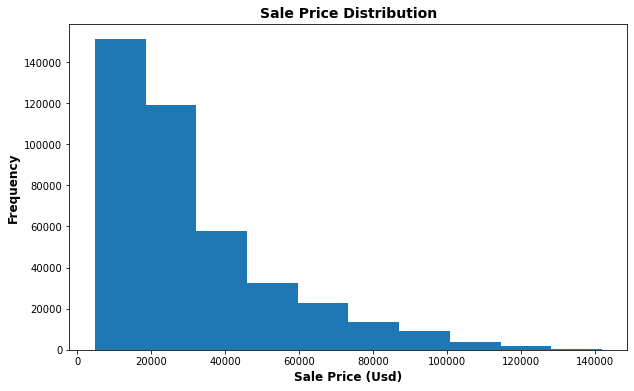

In [7]:
# Plot the SalePrice distribution 
plt.subplots(figsize=(10, 6))
plt.hist(df['SalePrice'])
plt.xlabel('Sale Price (USD)'.title(), fontsize=12, weight='bold')
plt.ylabel('Frequency'.title(), fontsize=12, weight='bold')
plt.title('Sale Price Distribution'.title(), fontsize=14, weight='bold');

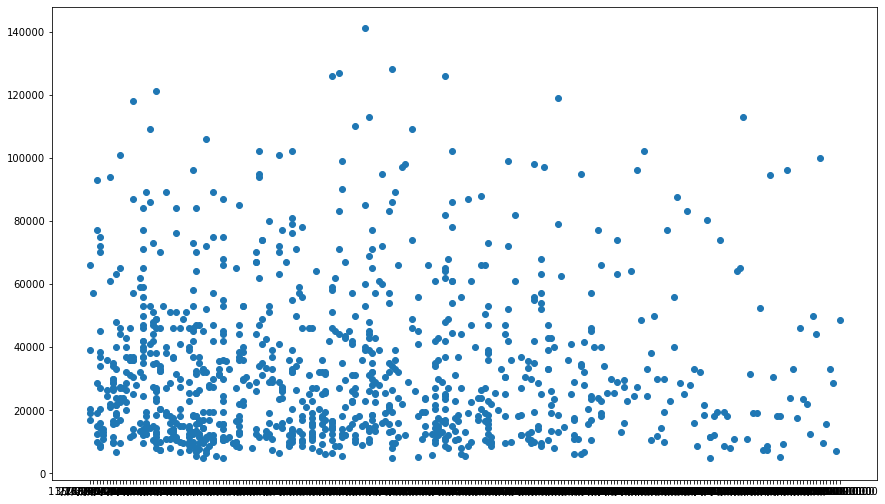

In [8]:
# Scatter plot between saledate and saleprice columns
fig, ax = plt.subplots(figsize=(14.78, 8.7))
ax = ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000]);

**Note : saledate dtype is an object and rather than datetime object.**

## Date Parsing

When workin with time series data, we want to enrich the time & date component as much as possible.

We can do that by telling pandas which column has dates in it using the parse_dates `parameter`.

In [1]:
# Import data again but this time with the parse_dates parameter 
df = pd.read_csv('data/TrainAndValid.csv',
                 low_memory=False,
                parse_dates=['saledate'])

NameError: name 'pd' is not defined

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

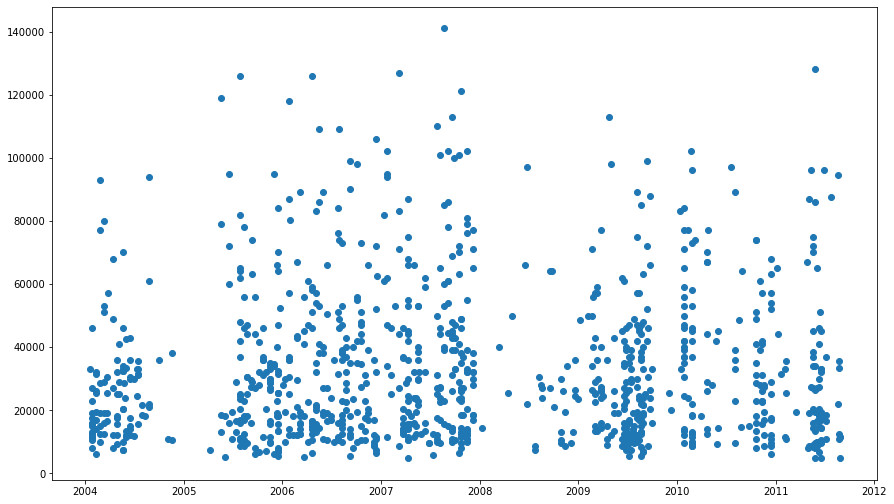

In [11]:
# Scatter plot between saledate and saleprice columns after setting parse_dates parameter
fig, ax = plt.subplots(figsize=(14.78, 8.7))
ax = ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000]);

## Sort DataFrame by saledate

When working with a time series data, it's a good practice to sort it by date

In [12]:
# Sort dataframe in date order
df.sort_values(by=['saledate'], ascending=True, inplace=True)
df.saledate.head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

## Make copy of the original DataFrame

We make copy of the dataframe so when we manipulate the copy, we still got our original data

In [13]:
# Make copy to work on 
df_temp = df.copy()

## Add a datetime parameter to saledate column 

In [14]:
# Add new features : saleyear, salemonth, saleday
df_temp['saleYear'] = df_temp.saledate.dt.year
df_temp['saleMonth'] = df_temp.saledate.dt.month
df_temp['saleDay'] = df_temp.saledate.dt.day
df_temp['saleDayOfWeek'] = df_temp.saledate.dt.dayofweek
df_temp['saleDayOfYear'] = df_temp.saledate.dt.dayofyear

In [15]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [16]:
# Since we have enriched our dataframe with the datetime features, we can remove 'saledate' column
df_temp.drop('saledate', axis=1, inplace=True)

## 5. Modelling

At this point we have done enough of EDA(Note that we can do much more visually and with some functions), but now let's do some model-driven EDA.

## Convert string to categories

One way to turn all data into numbers is by converting them to pandas categories.
We can check the different datatypes compatible with pandas here:
https://pandas.pydata.org/docs/reference/api/pandas.api.types.is_object_dtype.html

In [17]:
# Example : check if a column is a string dataype with pandas api
pd.api.types.is_string_dtype(df_temp['UsageBand'])

True

In [18]:
# Find column which contain strings
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)
        
# df_temp.items is a dictionary that held columns names as keys and content of rows as values

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [19]:
# Convert all strings to pandas category 
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label] = content.astype('category').cat.as_ordered()

In [20]:
df_temp.info()
# As we can see all strings data are now category

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

## Save preprocessed data 

Export data to csv so if we stop our notebook we can just import our manipulated dataframe and start exactly where we have stopped.

In [21]:
# Export current temporary dataframe
df_temp.to_csv('data/traintemp.csv',
               index=False)

In [22]:
# Import preprocessed data
df_temp = pd.read_csv('data/traintemp.csv',
                      low_memory=False)

## Fill Missing Values 

### Fill Numeric Missing Values 

In [23]:
# Check for numeric column datatype
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [24]:
# Check for which numeric column have null values
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isna(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [25]:
# Fill numeric rows with the median 
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isna(content).sum():
            # Create a binary column that tell us if the value is missing 
            df_temp[label+'_is_missing'] = pd.isnull(content)
            # Fill missing values with the median
            df_temp[label] = content.fillna(content.median())

In [26]:
# Why we have used the 'median'? => Because the median is more robust than the mean which is more affected by outliers
# Median robust to the effect of outliers 

# Demonstration
hundreds = np.full((1000,), 100)
hundreds_billion = np.append(hundreds, 100000000)

# Get the median and the mean of each array 
np.mean(hundreds), np.median(hundreds), np.mean(hundreds_billion), np.median(hundreds_billion)

(100.0, 100.0, 100000.0, 100.0)

In [27]:
# return to project
# Check for missing numeric values
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isna(content).sum():
            print(label)

# That returns nothing, because nulls are filled with the median now 

In [28]:
# Check to see how many examples were missing
# Since we have created a binary column to tell us if a column held missing values
df_temp.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [29]:
df_temp.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleDay', 'saleDayOfWeek', 'saleDayOfYear', 'auctioneerI

In [30]:
df_temp.isna().sum()
# we still have null values (categories)

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

### Filling and turning categorical variables into numbers 

In [31]:
# Check for non_numeric columns
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [32]:
# Turn categorical variables into numbers and fill missing
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add a binary column to indicate whether a sample had missing value
        df_temp[label+'_is_missing'] = pd.isnull(content)
        # Turn categories into numbers and add +1 to fill nan because pandas assign -1 to nan for categorical variables 
        df_temp[label] = pd.Categorical(content).codes+1       

In [33]:
# Check for missing values
df_temp.isna().sum()[:20]

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
dtype: int64

**We finished with having a huge number of columns and that's caused by the binary informative columns that we have just created**

Now all our data is numeric as well as our dataframe dosen't contain missing values, we should be able to build a machine learning model to help us predict the `saleprice` of buldozers.

In [34]:
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


In [35]:
%%time

# Build a machine learning model (hint : we will predict saleprice using independent variables)
from sklearn.ensemble import RandomForestRegressor

# magic time function, aimed to calculate modelling time because we have a really large amount of data in this project
# Performance and fast model are always in mind for ML Engineer and Data-Scientist


# Instantite the model
model = RandomForestRegressor(n_jobs=-1, random_state=42)
# We have setting n_jobs to -1 because of the large amount of data, so I want to work with all processors of my computer 

#Fit the model
model.fit(df_temp.drop('SalePrice', axis=1), df_temp['SalePrice'])

Wall time: 2min 35s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [36]:
model.score(df_temp.drop('SalePrice', axis=1), df_temp['SalePrice'])

0.9875468079970562

**Question:** Why is the above metric does not hold water?(why the metric is not reliable?)

**Answer : Because we have trained and scored the model on the same dataset which is unreliable, the model know all this data, eventually it give us a high score** 

In [37]:
# Split the data into train and validation sets
# We will split data by the saleyear '2012'
df_val = df_temp[df_temp.saleYear == 2012]
df_train = df_temp[df_temp.saleYear != 2012]
len(df_val), len(df_train)

(11573, 401125)

In [38]:
# Split data into X, y sets
X_train, y_train = df_train.drop('SalePrice', axis=1), df_train['SalePrice']
X_valid, y_valid = df_val.drop('SalePrice', axis=1), df_val['SalePrice']

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

## Building an evaluation funtcion

In [39]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

#Create an evaluation function
def rmsle(y_test, y_preds):
    """
    Calculates the root mean squared log error between predictions
    and true labels
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {'Trainig MAE' : mean_absolute_error(y_train, train_preds),
              'Valid MAE' : mean_absolute_error(y_valid, val_preds),
              'Training RMSLE' : rmsle(y_train, train_preds),
              'Valid RMSLE' : rmsle(y_valid, val_preds),
              'Training R^2' : r2_score(y_train, train_preds),
              'Valid R^2' : r2_score(y_valid, val_preds)}
    return scores

In [40]:
# try modelling with a max_samples = 10000 
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                              max_samples=10000)

In [41]:
%%time
# Fitting the model
model.fit(X_train, y_train)

Wall time: 6.09 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [42]:
show_scores(model)

{'Trainig MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003,
 'Training R^2': 0.8606658995199189,
 'Valid R^2': 0.8320374995090507}

## Hyperparameter tuning with RandomizedSearchCV

In [43]:
%%time

from sklearn.model_selection import RandomizedSearchCV

rf_grid = {'n_estimators' : np.arange(10, 100, 10),
           'max_depth' : [None, 3, 5, 10],
           'min_samples_split' : np.arange(2, 20, 2),
           'min_samples_leaf' : np.arange(1, 20, 2),
           'max_features' : [0.5, 1, 'sqrt', 'auto'],
           'max_samples' : [10000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=42),
                              param_distributions=rf_grid,
                              n_iter=2,
                              cv=5,
                              verbose=True)

# Fit the RandomizedSearchCV model on X_train, y_train
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   23.0s finished


Wall time: 24.5 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [44]:
# Get the best params 
rs_model.best_params_

{'n_estimators': 30,
 'min_samples_split': 14,
 'min_samples_leaf': 3,
 'max_samples': 10000,
 'max_features': 'sqrt',
 'max_depth': 10}

In [45]:
show_scores(rs_model)
# That give us a worst evaluation comparing to the first model(explained by n_iter=2, just two combination)

{'Trainig MAE': 9042.411410646953,
 'Valid MAE': 10334.844408624764,
 'Training RMSLE': 0.39849440132650676,
 'Valid RMSLE': 0.4150299358477874,
 'Training R^2': 0.6771302951432712,
 'Valid R^2': 0.6920376460034185}

## Train the model with the best hyperparameters 

**Note : these hypers were found after 100 iterations of RandomizedSearchCV.**

In [46]:
%%time

# Create the model with most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=42)

# Fit the ideal model
ideal_model.fit(X_train, y_train)

Wall time: 30.9 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [47]:
# Scores for ideal model(trainded on all the data)
show_scores(ideal_model)

{'Trainig MAE': 2953.8161137163484,
 'Valid MAE': 5951.247761444453,
 'Training RMSLE': 0.14469006962371858,
 'Valid RMSLE': 0.24524163989538328,
 'Training R^2': 0.9588145522577225,
 'Valid R^2': 0.8818019502450094}

In [48]:
# Scores for rs_model(trained on 10,000 examples)
show_scores(rs_model)

{'Trainig MAE': 9042.411410646953,
 'Valid MAE': 10334.844408624764,
 'Training RMSLE': 0.39849440132650676,
 'Valid RMSLE': 0.4150299358477874,
 'Training R^2': 0.6771302951432712,
 'Valid R^2': 0.6920376460034185}

## Import test data and make predictions 

In [53]:
df_test = pd.read_csv('data/Test.csv',
                      low_memory=False,
                      parse_dates=['saledate'])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


### Preprocess the  data (getting the test dataset on the same format as our trainig dataset)

In [54]:
def preprocess_data(df):
    """
    Performs transformations on data and return transformed df.
    """
    # Add new features : saleyear, salemonth, saleday
    df['saleYear'] = df.saledate.dt.year
    df['saleMonth'] = df.saledate.dt.month
    df['saleDay'] = df.saledate.dt.day
    df['saleDayOfWeek'] = df.saledate.dt.dayofweek
    df['saleDayOfYear'] = df.saledate.dt.dayofyear
    
    df.drop('saledate', axis=1, inplace=True)
    
    # fill numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Create a binary column that tell us if the value is missing 
                df[label+'_is_missing'] = pd.isnull(content)
                # Fill missing values with the median
                df[label] = content.fillna(content.median())

            # fill categorical missing values and turning categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            # Add a binary column to indicate whether a sample had missing value
            df[label+'_is_missing'] = pd.isnull(content)
            # Turn categories into numbers and add +1 to fill nan because pandas assign -1 to nan for categorical variables 
            df[label] = pd.Categorical(content).codes+1 
            
    return df

In [55]:
df_test = preprocess_data(df_test)

In [56]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


**Hint : The test dataset differ to the train dataset in the feature numbers (101 cols for test set and 102 cols for train set) for this reason our ideal_model will raise a value error if we want to make predictions on the test dataset.**

In [57]:
# We can find how cols differ by sets
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

This because our test set doesen't have 'auctioneerID' missing values so we haven't a column called `auctioneerID_is_missing` in test dataset, to handle this we can manually add this column to the test dataset and set it to False.

In [58]:
# Manually add 'auctioneerID_is_missing' column to the test dataframe
df_test['auctioneerID_is_missing'] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


Finally our test dataframe now has the same features as our training dataframe, we can so make predictions on the test data.

In [60]:
# Make predictions on test data
test_preds = ideal_model.predict(df_test)

We have make predictions on test data, but they are not in the same format kaggle is asking for.

You can find Evaluation metrics and requirements here :
https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

In [61]:
# Create a predictions dataframe to kaggle submission
df_preds = pd.DataFrame()
df_preds['SalesID'] = df_test['SalesID']
df_preds['SalePrice'] = test_preds
df_preds

,SalesID,SalePrice
0,1227829,20614.367809
1,1227844,19897.801707
2,1227847,44852.219594
3,1227848,68346.325323
4,1227863,39487.349708
...,...,...
12452,6643171,46466.092910
12453,6643173,17500.493352
12454,6643184,14296.986205
12455,6643186,22164.857577


In [62]:
# Export prediction data (final result)
df_preds.to_csv('data/test_predictions_final_result.csv', index=False)

## Feature importance 

Feature importance seeks to figure out which of different atributes of the data were most important when it comes to predicting the target variable `SalePrice`.

In [66]:
# Ideal feaature importance
ideal_model.feature_importances_

array([3.39445533e-02, 1.81148281e-02, 4.09167072e-02, 1.70752171e-03,
       3.40797459e-03, 2.08200698e-01, 2.95067052e-03, 1.10113725e-03,
       4.16122668e-02, 4.71911805e-02, 6.23815431e-02, 4.67433955e-03,
       1.52524442e-02, 1.52517337e-01, 4.72224713e-02, 5.96817956e-03,
       1.29351899e-03, 2.78088439e-03, 2.37248769e-03, 6.17114453e-02,
       8.13525488e-04, 3.61873268e-05, 9.19098115e-04, 2.23170993e-04,
       1.28102678e-03, 2.06519636e-05, 2.01477316e-03, 6.63364759e-03,
       2.15274492e-03, 2.50178165e-03, 4.63902393e-03, 3.85873985e-03,
       2.76062667e-03, 1.00782454e-03, 2.47969268e-04, 6.04239818e-03,
       7.64997072e-04, 1.57100537e-02, 2.29716203e-03, 2.58372272e-03,
       8.07637426e-04, 9.18548690e-04, 1.35656446e-03, 5.81458569e-04,
       4.96716928e-04, 3.79552257e-04, 5.31712788e-04, 2.71823509e-03,
       8.34294376e-04, 3.12136841e-04, 2.14075157e-04, 7.42422919e-02,
       3.80158492e-03, 5.67641024e-03, 2.87154703e-03, 9.83349904e-03,
      

In [78]:
# Create a helper function to plot feature importances
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({'features' : columns, 'feature_importances' : importances}).
        sort_values('feature_importances', ascending=False).reset_index(drop=True))
    # Plot the DataFrame
    fig, ax = plt.subplots(figsize=(14.78, 8.7))
    ax.barh(df['features'][:n], df['feature_importances'][:20])
    ax.invert_yaxis()
    ax.set_ylabel('Feature'.title(), fontsize=12, weight='bold')
    ax.set_xlabel('Feature Importances'.title(), fontsize=12, weight='bold')
    ax.set_title('Bulldozers Kaggle Dataset Feature Importances'.title(), fontsize=14, weight='bold')

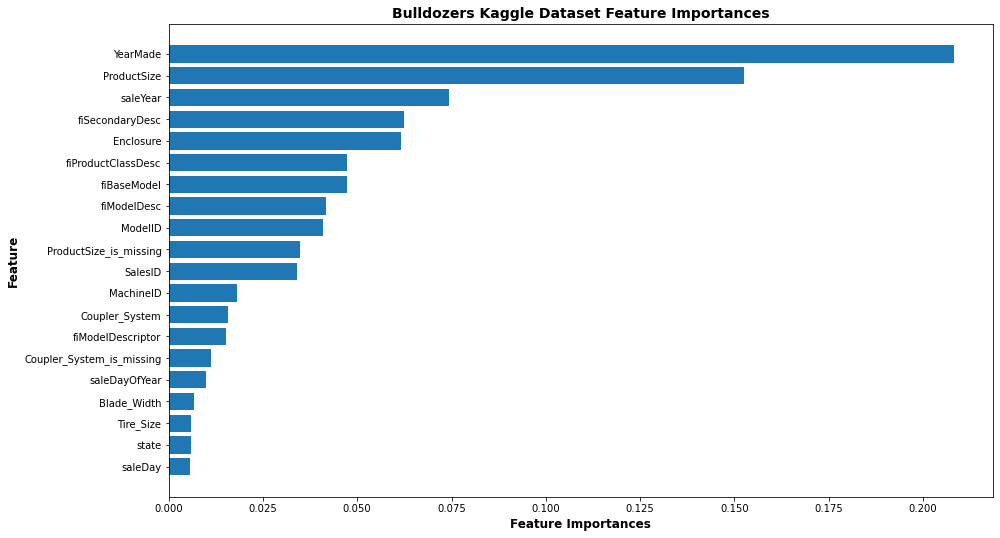

In [79]:
# Plot feature importance bar-chart
plot_features(X_train.columns, ideal_model.feature_importances_)